In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter as fsf
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, negative_log, load_style_sheet
import numpy as np
import vice
import sys
sys.path.append("..")
from src.utils import subsample_stellar_populations, get_velocity_profile, oh_to_12pluslog
from src.plots.utils import weighted_median, feuillet2019_data
load_style_sheet("papers")
print(sys.version_info)

/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


In [2]:
outputs = [
    "../outputs/expifr/amd/base",
    "../outputs/expifr_gse/amd/tacc3p2/massratio3/expsigma/gsebetaphiin-0p8"
]
outputs = [vice.output(name) for name in outputs]

/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_38148/3611289516.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


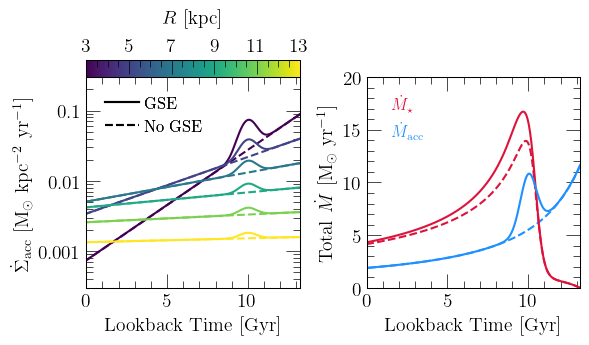

In [17]:
COLORMAP = "viridis"
RADII = [3, 5, 7, 9, 11, 13]

fig = plt.figure(figsize = (6, 3.5))
axes = []
for i in range(2):
    axes.append(fig.add_subplot(121 + i))
    axes[i].set_xlabel(r"Lookback Time [Gyr]")
    axes[i].set_xlim([0, 13.2])
axes[0].set_ylabel(r"$\dot \Sigma_\text{acc}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]")
axes[0].set_yscale("log")
axes[0].set_ylim([3.0e-4, 0.3])
axes[0].yaxis.set_major_formatter(fsf("%g"))

axes[1].set_ylabel(r"Total $\dot M$ [M$_\odot$ yr$^{-1}$]")
axes[1].set_ylim([0, 20])

norm = plt.Normalize(vmin = min(RADII), vmax = max(RADII))
cmap = plt.cm.ScalarMappable(cmap = COLORMAP, norm = norm)
cbar_ax = fig.add_axes([0.02, 0.8, 0.5, 0.05])
cbar = plt.colorbar(cmap, cax = cbar_ax, orientation = "horizontal", location = "top")
cbar.set_label(r"$R$ [kpc]", labelpad = 10)
cbar.set_ticks(RADII)

lines = []
lines.append(axes[0].plot([100, 200], [100, 200], c = named_colors()["black"], linestyle = "-", label = "GSE")[0])
lines.append(axes[0].plot([100, 200], [100, 200], c = named_colors()["black"], linestyle = "--", label = "No GSE")[0])
kwargs = {
    "loc": mpl_loc("upper left"),
    "bbox_to_anchor": (0.02, 0.98),
    "handlelength": 2,
    "fontsize": 12,
    "ncol": 1
}
leg = axes[0].legend(**kwargs)
lines[0].remove()
lines[1].remove()
axes[0].add_artist(leg)

def plot_total(ax, output, which = "ifr", zone_width = 0.1, **kwargs):
    yvals = []
    lookback = output.zones["zone0"].history["lookback"]
    for i in range(len(lookback)):
        y = 0
        for j in range(len(output.zones.keys())):
            zone = output.zones["zone%d" % (j)]
            y += zone.history[which][i]
        yvals.append(y)
    ax.plot(lookback, yvals, **kwargs)

def plot_specific_radius(ax, output, radius, which = "ifr", zone_width = 0.1, **kwargs):
    zone = int(radius / zone_width)
    zone = output.zones["zone%d" % (zone)]
    area = np.pi * ((radius + zone_width)**2 - radius**2)
    yvals = [y / area for y in zone.history[which]]
    ax.plot(zone.history["lookback"], yvals, **kwargs)

for i in range(len(RADII)):
    kwargs = {
        "c": cmap.to_rgba(RADII[i]),
        "linestyle": "--"
    }
    plot_specific_radius(axes[0], outputs[0], RADII[i], which = "ifr", **kwargs)
    kwargs["linestyle"] = "-"
    kwargs["label"] = r"$%d$ kpc" % (RADII[i])
    plot_specific_radius(axes[0], outputs[1], RADII[i], which = "ifr", **kwargs)

plot_total(axes[1], outputs[0], which = "sfr", linestyle = "--", c = named_colors()["crimson"])
plot_total(axes[1], outputs[0], which = "ifr", linestyle = "--", c = named_colors()["dodgerblue"])
plot_total(axes[1], outputs[1], which = "sfr", linestyle = "-", c = named_colors()["crimson"], label = r"$\dot M_\star$")
plot_total(axes[1], outputs[1], which = "ifr", linestyle = "-", c = named_colors()["dodgerblue"], label = r"$\dot M_\text{acc}$")

kwargs = {
    "loc": mpl_loc("upper left"),
    "bbox_to_anchor": (0.02, 0.98),
    "handlelength": 0,
    "fontsize": 12,
    "ncol": 1
}
leg = axes[1].legend(**kwargs)
fancy_legend(leg, ["crimson", "dodgerblue"])

plt.tight_layout()
plt.subplots_adjust(top = 0.78)
cbar_ax.set_position([
    axes[0].get_position().x0,
    axes[0].get_position().y1,
    axes[0].get_position().x1 - axes[0].get_position().x0,
    0.05
])
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./evol/ifrs-total-sfrs.%s" % (ext), **kwargs)
plt.show()

In [6]:
outputs = [
    "../outputs/expifr/amd/base",
    # "../outputs/expifr_gse/amd/tacc3p2/massratio3/expsigma/gsebetaphiin+0p8",
    # "../outputs/expifr_gse/amd/tacc3p2/massratio3/constsigma/gsebetaphiin-0p8",
    # "../outputs/expifr_gse/amd/tacc3p2/massratio3/expsigma/gsebetaphiin+0",
    "../outputs/expifr_gse/amd/tacc3p2/massratio3/expsigma/gsebetaphiin-0p8-rscale4",
    "../outputs/expifr_gse/amd/tacc3p2/massratio3/expsigma/gsebetaphiin-0p8-rscale6",
    "../outputs/expifr_gse/amd/tacc3p2/massratio3/expsigma/gsebetaphiin-0p8"
]
outputs = [vice.output(name) for name in outputs]

/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_53748/2687297720.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


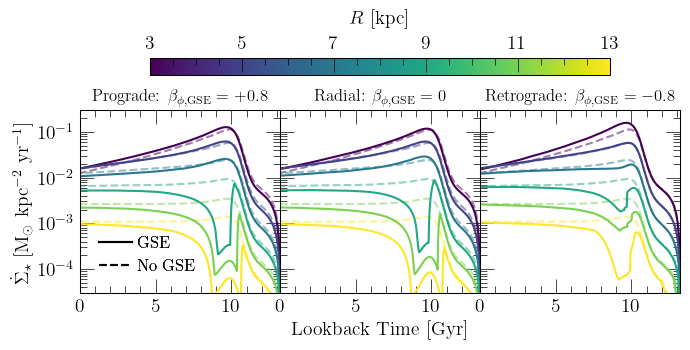

In [8]:
COLORMAP = "viridis"
RADII = [3, 5, 7, 9, 11, 13]
TITLES = [
    r"Prograde: $\beta_{\phi,\text{GSE}} = +0.8$",
    r"Radial: $\beta_{\phi,\text{GSE}} = 0$",
    r"Retrograde: $\beta_{\phi,\text{GSE}} = -0.8$"
]

fig = plt.figure(figsize = (7, 3.5))
axes = []
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    if i:
        plt.setp(axes[i].get_yticklabels(), visible = False)
    else:
        axes[i].set_ylabel(r"$\dot \Sigma_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]")
    axes[i].set_yscale("log")
    axes[i].set_xlim([0, 13.2])
    axes[i].set_xticks([0, 5, 10])
    axes[i].set_ylim([3.0e-5, 0.3])
    axes[i].set_title(TITLES[i], fontsize = 12)
axes[1].set_xlabel(r"Lookback Time [Gyr]")

lines = []
lines.append(axes[0].plot([100, 200], [100, 200], c = named_colors()["black"], linestyle = "-", label = "GSE")[0])
lines.append(axes[0].plot([100, 200], [100, 200], c = named_colors()["black"], linestyle = "--", label = "No GSE")[0])
kwargs = {
    "loc": mpl_loc("lower left"),
    "bbox_to_anchor": (0.02, 0.02),
    "handlelength": 2,
    "fontsize": 12,
    "ncol": 1
}
leg = axes[0].legend(**kwargs)
lines[0].remove()
lines[1].remove()
axes[0].add_artist(leg)

norm = plt.Normalize(vmin = min(RADII), vmax = max(RADII))
cmap  = plt.cm.ScalarMappable(cmap = COLORMAP, norm = norm)
cbar_ax = fig.add_axes([0.2, 0.8, 0.6, 0.1])
cbar = plt.colorbar(cmap, cax = cbar_ax, orientation = "horizontal", location = "top")
cbar.set_label(r"$R$ [kpc]", labelpad = 8)
cbar.set_ticks(RADII)

def plot_local_sfh(ax, output, radius, zone_width = 0.1, **kwargs):
    zone = int(radius / zone_width)
    zone = output.zones["zone%d" % (zone)]
    area = np.pi * ((radius + zone_width)**2 - radius**2)
    sfh = [s / area for s in zone.history["sfr"]]
    ax.plot(zone.history["lookback"], sfh, **kwargs)

for i in range(len(axes)):
    for j in range(len(RADII)):
        kwargs = {
            "c": cmap.to_rgba(RADII[j]),
            "linestyle": "--",
            "alpha": 0.5
        }
        plot_local_sfh(axes[i], outputs[0], RADII[j], **kwargs)

for i in range(1, len(outputs)):
    for j in range(len(RADII)):
        kwargs = {"c": cmap.to_rgba(RADII[j])}
        if i in [1, 2]: kwargs["zone_width"] = 1
        plot_local_sfh(axes[i - 1], outputs[i], RADII[j], **kwargs)
    

plt.tight_layout()
plt.subplots_adjust(wspace = 0, top = 0.7)
cbar_ax.set_position([
    axes[0].get_position().x0 + 0.1,
    axes[0].get_position().y1 + 0.1,
    axes[-1].get_position().x1 - axes[0].get_position().x0 - 0.2,
    0.05
])
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    # plt.savefig("./evol/sfrs-prograde-radial-retrograde.%s" % (ext), **kwargs)
plt.show()